In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import datetime
matplotlib.rcParams["font.family"] = "Questrial"

In [3]:
import numpy as np

In [4]:
years = [2729, 2699, 2613, 2583, 2562, 2530, 2501, 2490, 2470, 2400]
# 2714-2719 Choking
# 2322-2329 Acid
seasons = [[2714, 2719], [2322, 2329]]

In [5]:
values = [1 for _ in years]

def make_plot(capstyle, lw=20.0, ms=100):
    fig, ax = plt.subplots(figsize=(18,2), dpi=400)
    for s in seasons:
        ax.plot(s, [1]*len(s), c='#1f77b4', marker='', ls='-', lw=lw, solid_joinstyle="bevel",
                solid_capstyle=capstyle)
    sp = ax.scatter(years, [1]*len(years), edgecolor='#ff7f0e',
               marker='o', s=ms, facecolor='', lw=3.0)

    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(100))
    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(20))   
    fig.autofmt_xdate()

    # everything after this is turning off stuff that's plotted by default

    ax.yaxis.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_tick_params(labelsize='xx-large', size=10)
    ax.xaxis.set_tick_params(which='minor', size=5)

    ax.get_yaxis().set_ticklabels([])

    plt.xlim(2300, 2800)
    plt.ylim(0.9, 1.1)
    plt.show()

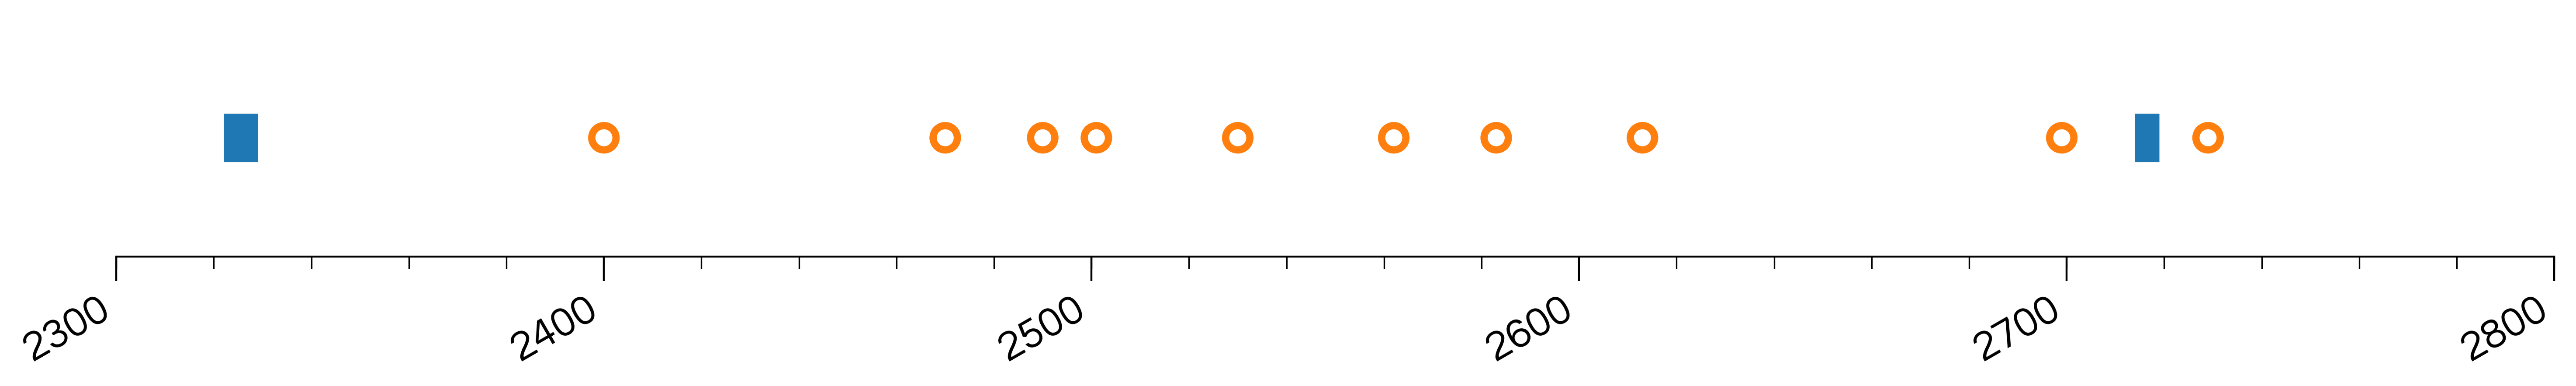

In [6]:
make_plot("butt")

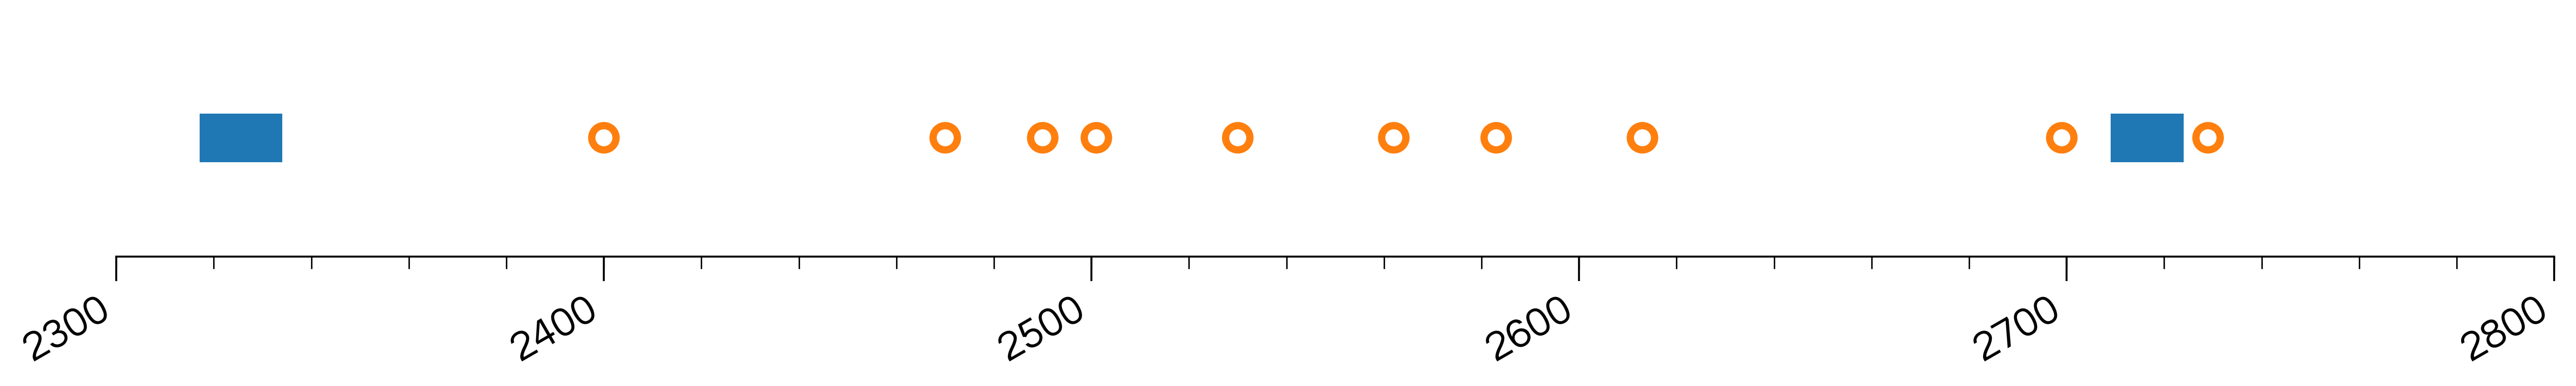

In [7]:
make_plot("projecting")

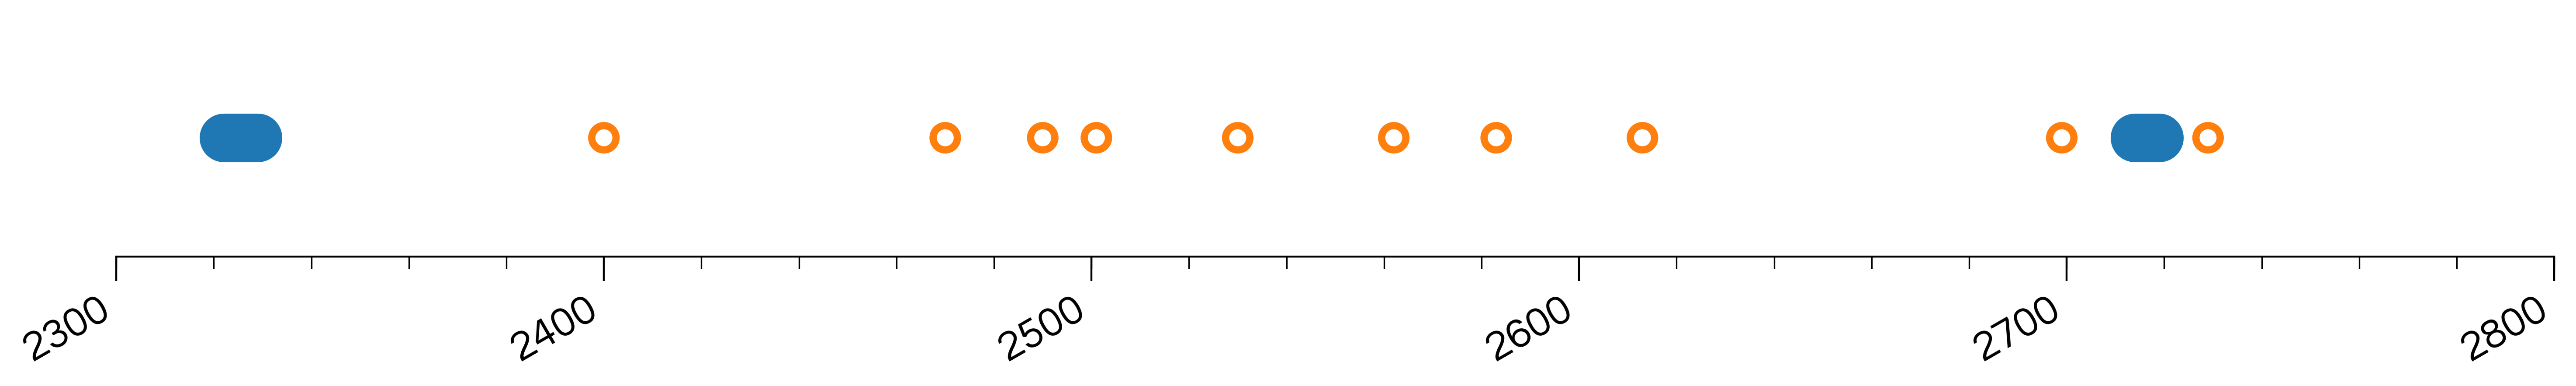

In [8]:
make_plot("round")

In [9]:
# GDP from https://fred.stlouisfed.org/series/GDP

In [10]:
def converter(v):
    return np.datetime64(v.decode("ascii"), 'D')

with open("Downloads/GDP.csv", "r") as f:
    data = np.loadtxt(f, skiprows=1, delimiter=",", converters = {0: converter},
                     dtype=np.dtype([("date", "datetime64[D]"), ("val", np.float64)]))

In [11]:
def make_gdp_plot(style):
    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.set_title("Style: %s" % style)
        ax.plot_date(data["date"].astype(datetime.datetime), data["val"], '-')
        plt.show()

In [12]:
for v in data["date"][240:260]: print(v)

2007-01-01
2007-04-01
2007-07-01
2007-10-01
2008-01-01
2008-04-01
2008-07-01
2008-10-01
2009-01-01
2009-04-01
2009-07-01
2009-10-01
2010-01-01
2010-04-01
2010-07-01
2010-10-01
2011-01-01
2011-04-01
2011-07-01
2011-10-01


In [13]:
for v in data["val"][240:260]: print(v)

14233.2
14422.3
14569.7
14685.3
14668.4
14813.0
14843.0
14549.9
14383.9
14340.4
14384.1
14566.5
14681.1
14888.6
15057.7
15230.2
15238.4
15460.9
15587.1
15785.3


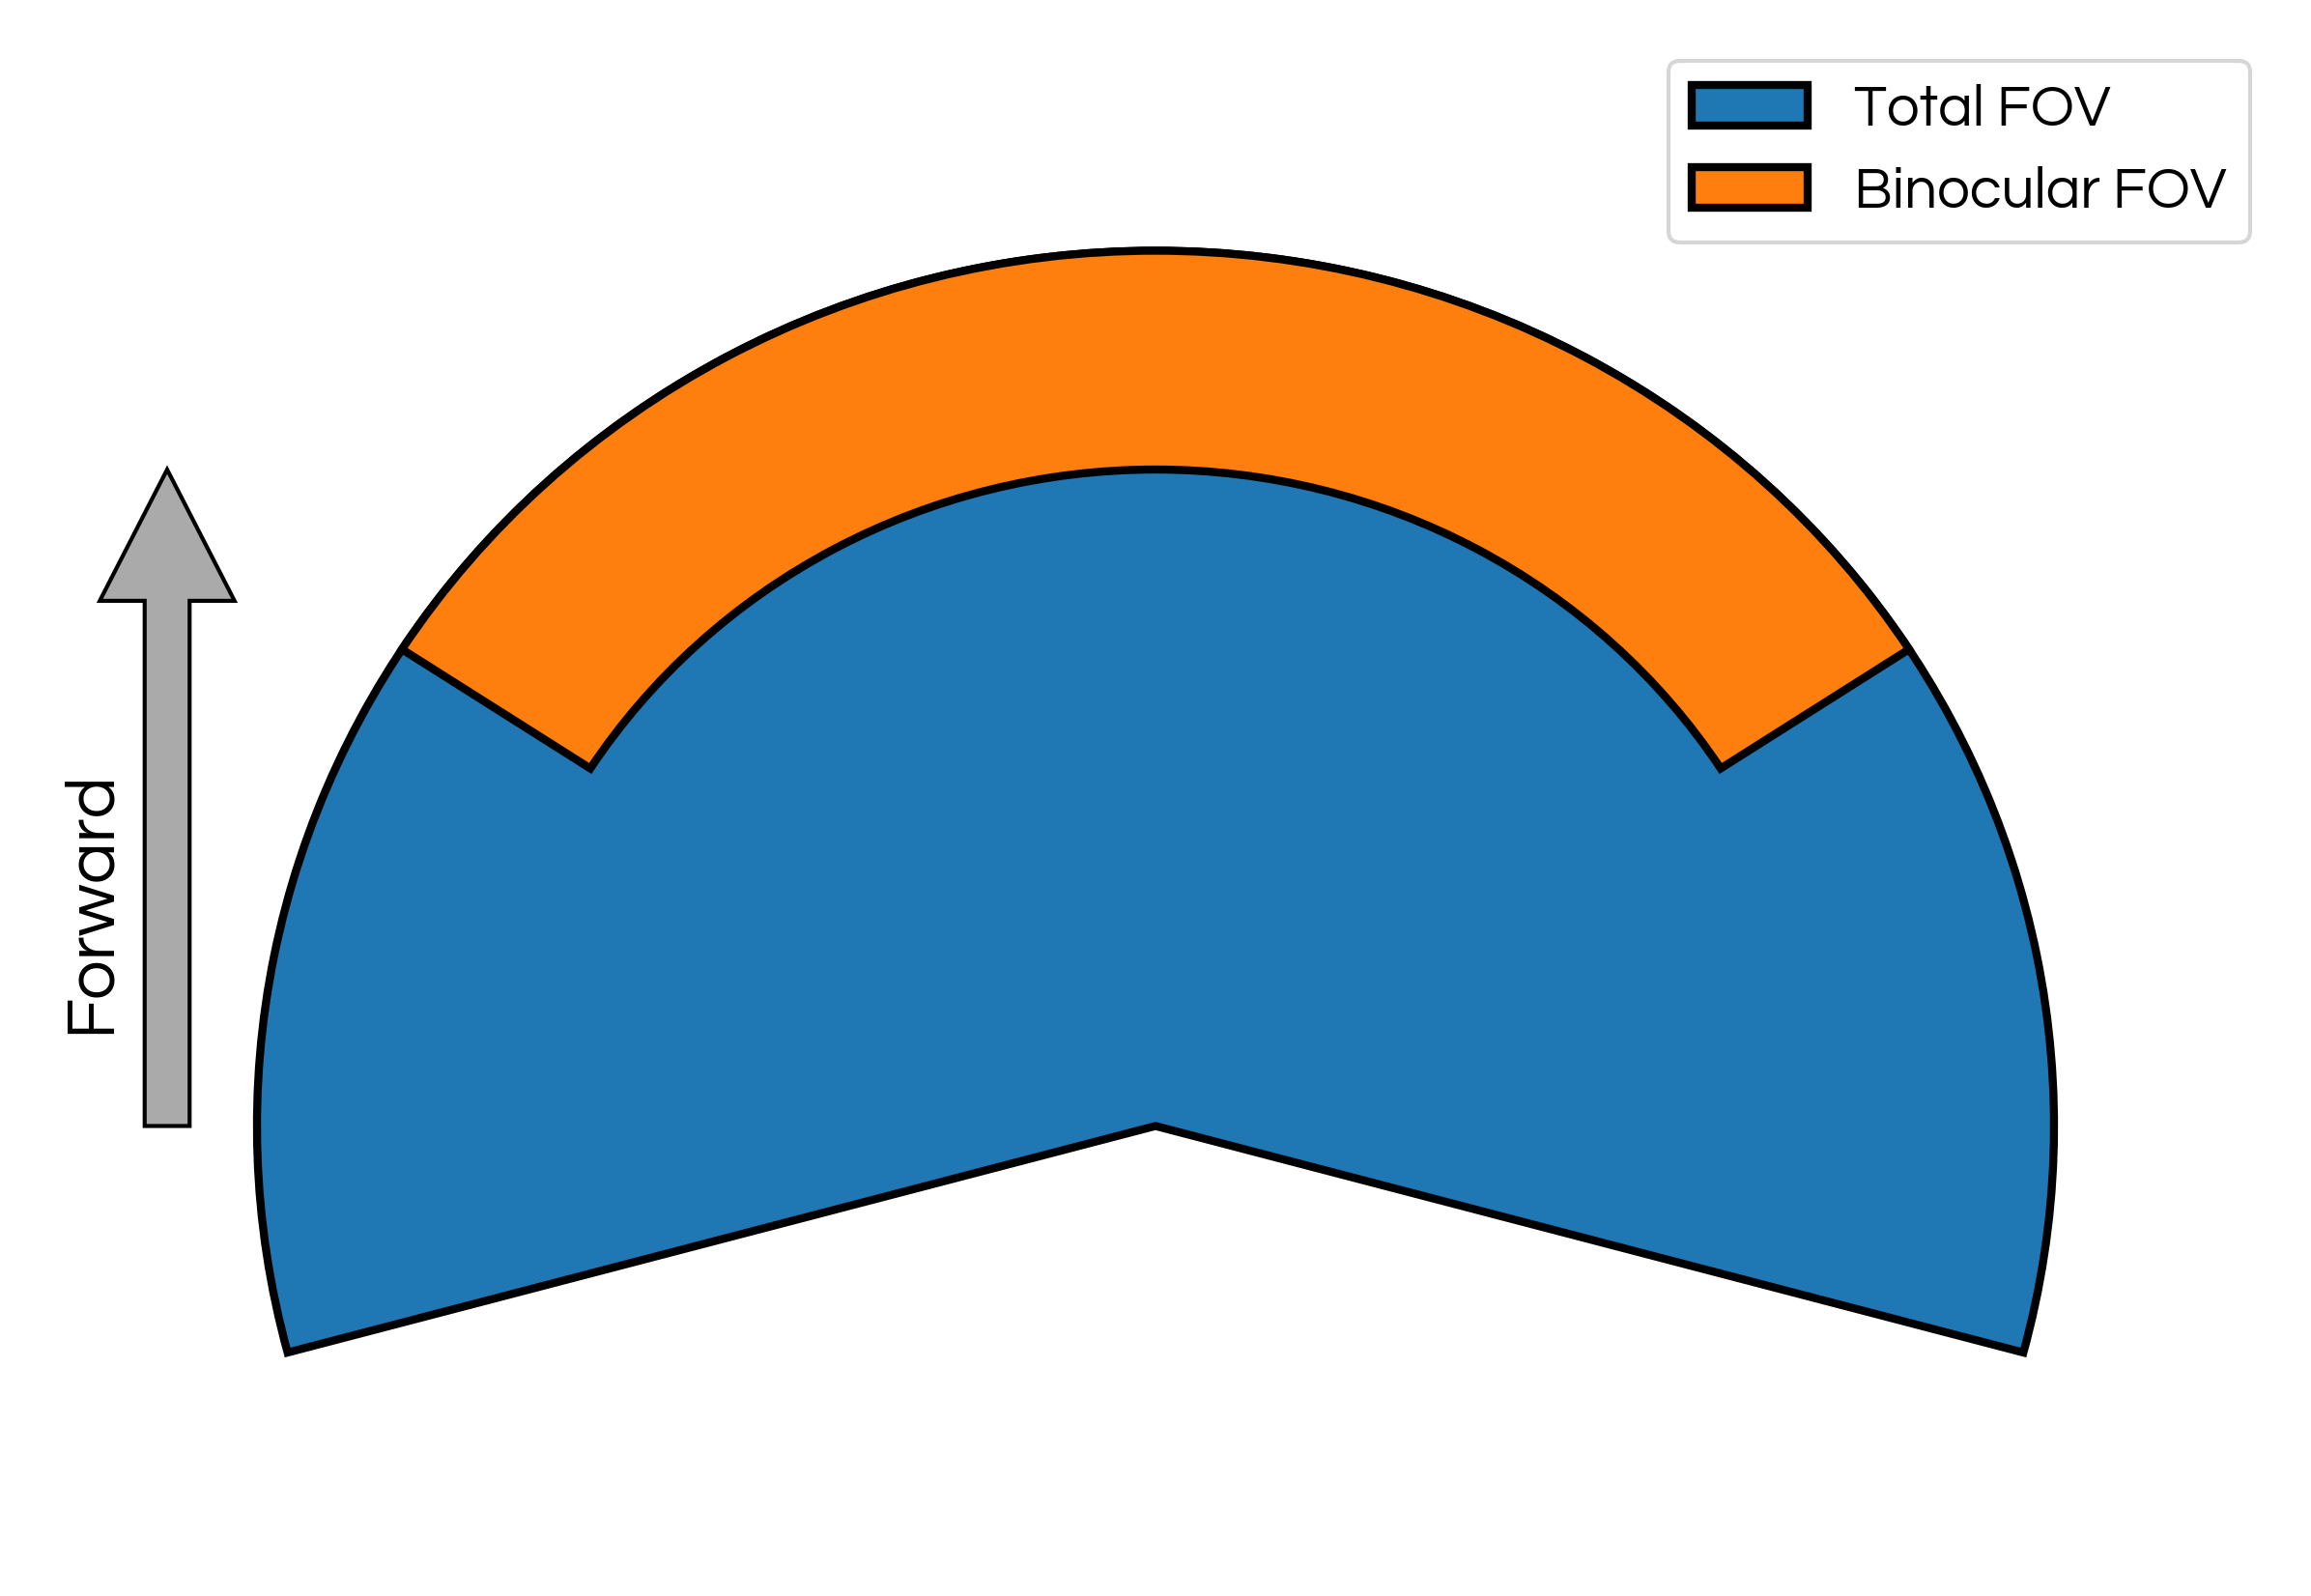

In [14]:
horizontal = matplotlib.patches.Wedge([0.0, 0.0], 1.0, 90 - (210/2.0), 90 + (210/2.0), lw=2.0, facecolor="#1f77b4", edgecolor="#000000")
binoc = matplotlib.patches.Wedge([0.0, 0.0], 1.0, 90 - (114/2.0), 90 + (114/2.0), width=0.25, lw=2.0, facecolor="#ff7f0e", edgecolor="#000000")
arrow = matplotlib.patches.Arrow(-1.10, 0.0, 0.0, 0.75, width=0.25, edgecolor="#000000", facecolor="#aaaaaa", label="forward")

fig, ax = plt.subplots(figsize=(10, 7), dpi=300)

plt.text(-1.22, 0.35, "Forward", rotation=90, fontsize="xx-large")

ax.add_patch(horizontal)
#ax.add_patch(binoc_outline)
ax.add_patch(binoc)
ax.add_patch(arrow)
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-0.5, 1.25)

ax.legend([horizontal, binoc], ["Total FOV", "Binocular FOV"], fontsize="x-large")

ax.set_xticks([])
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

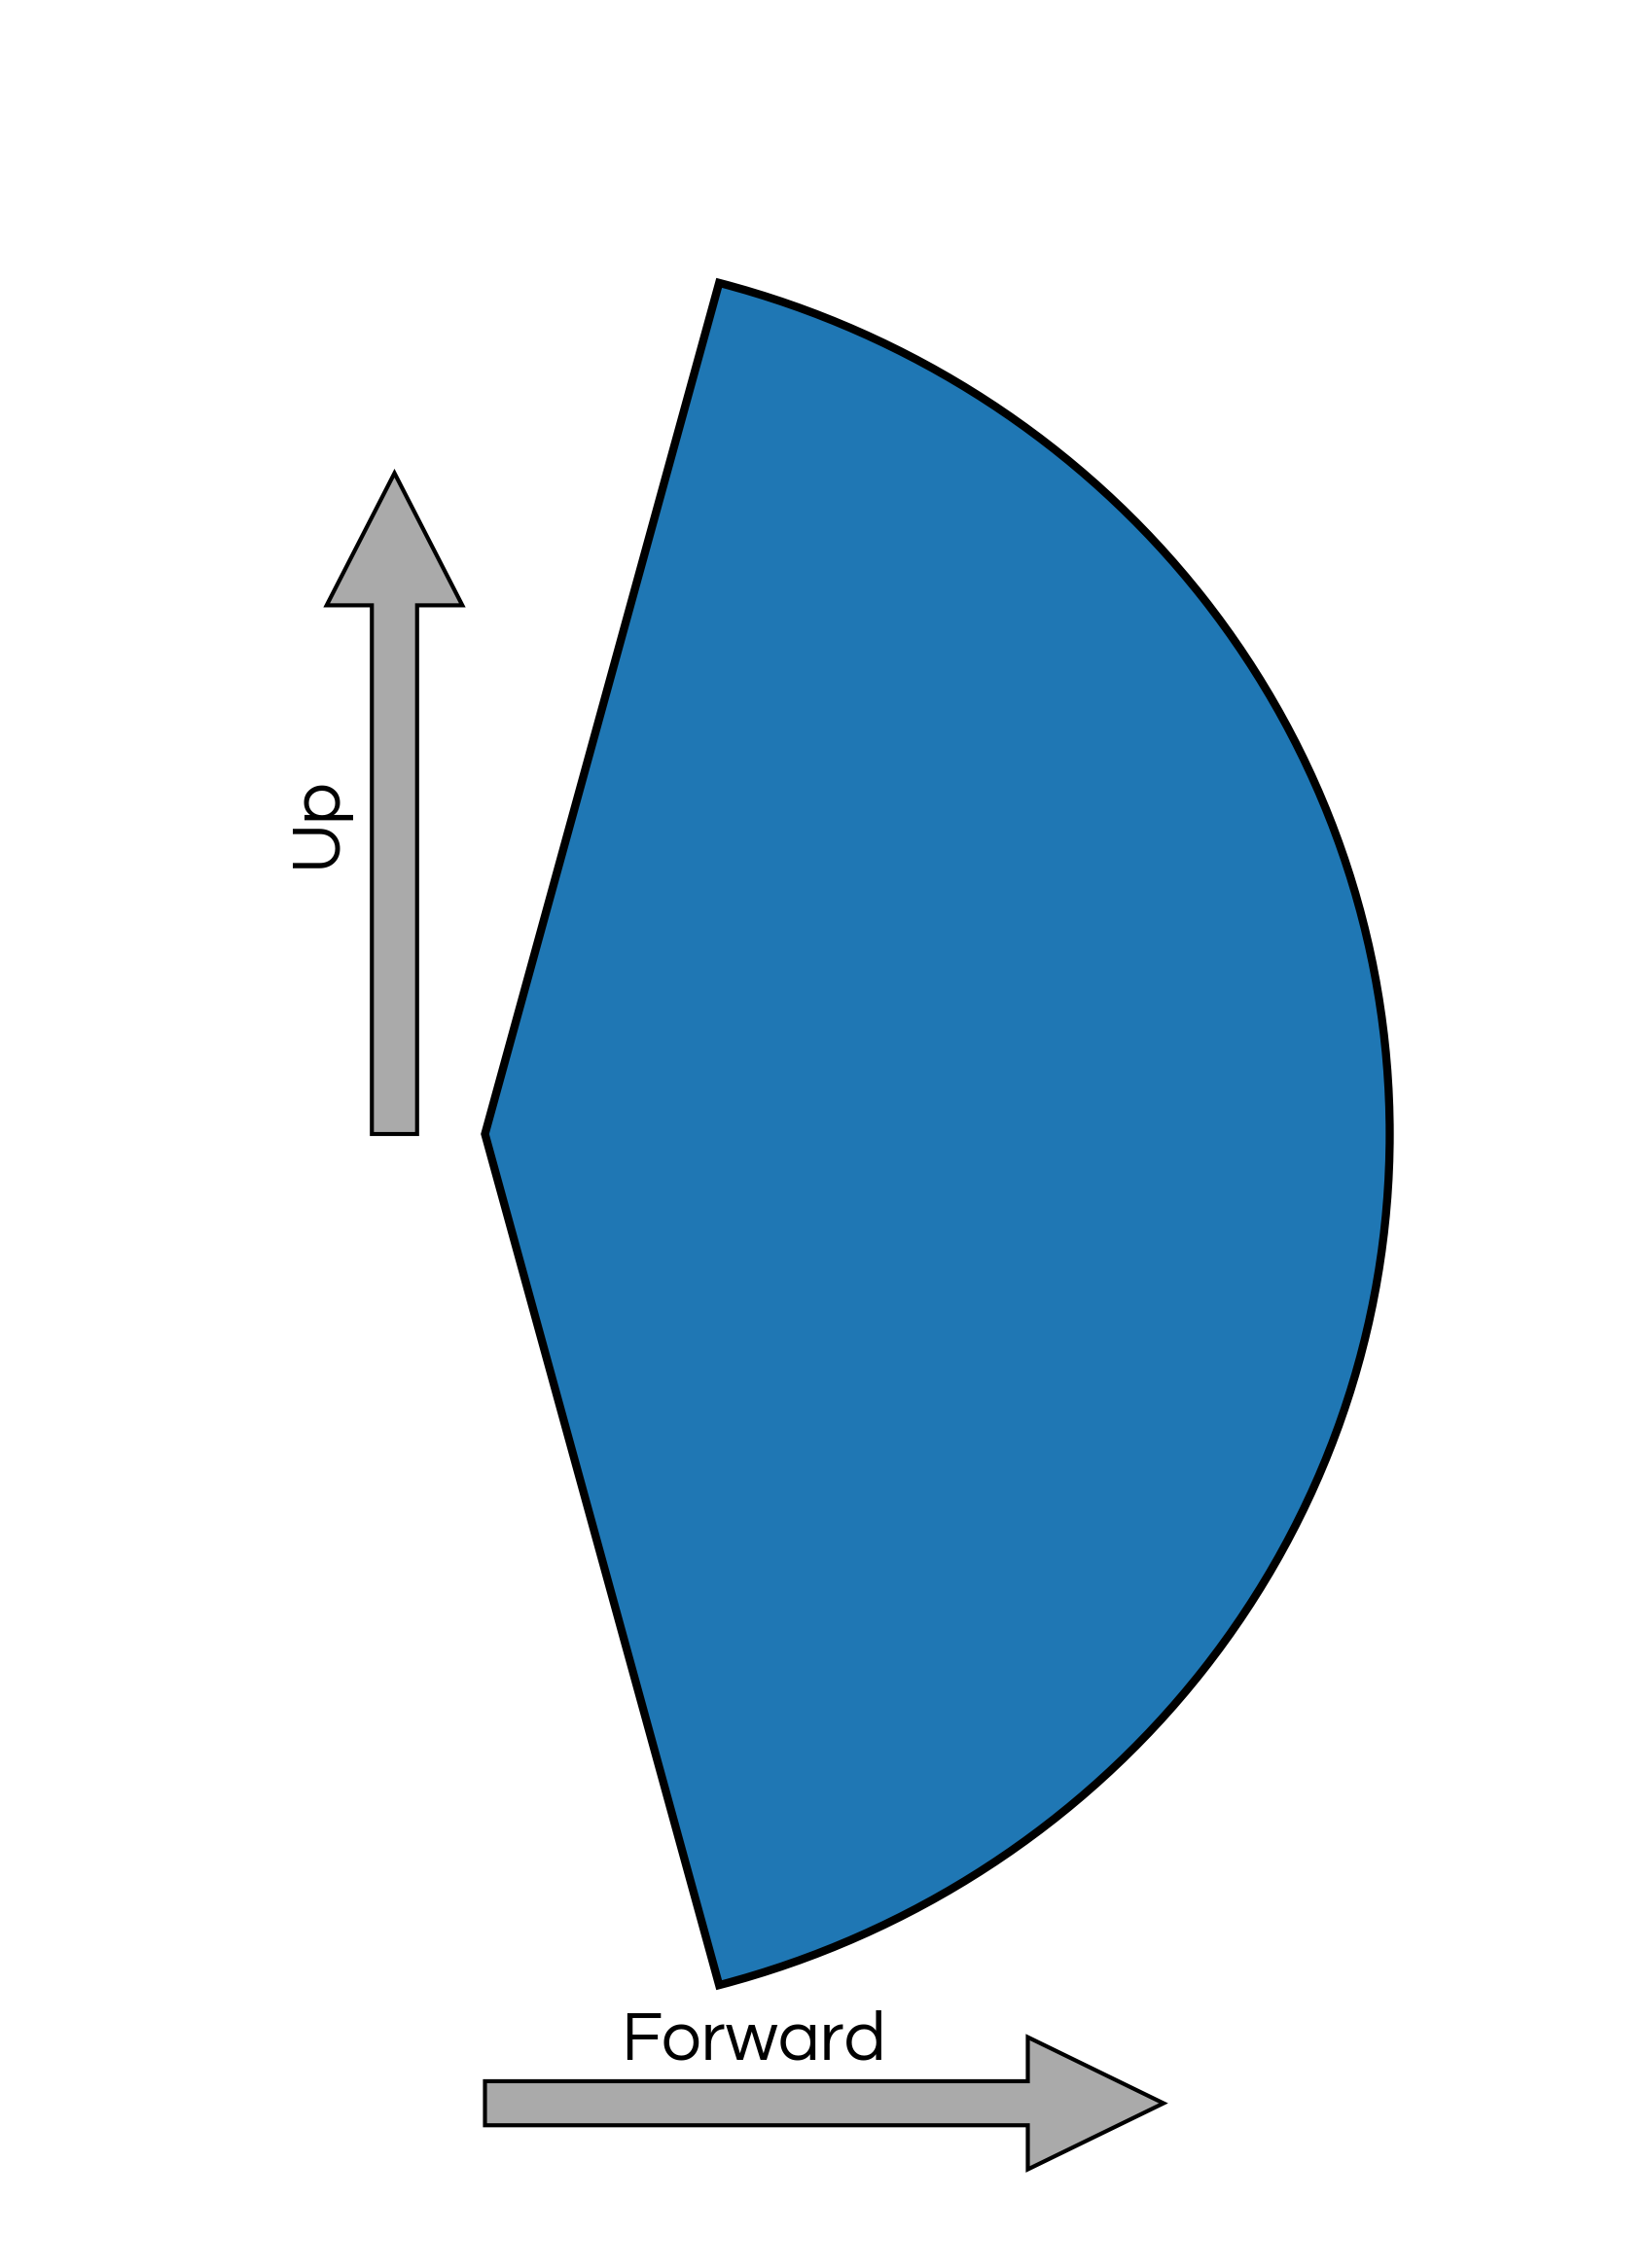

In [15]:
vertical = matplotlib.patches.Wedge([0.0, 0.0], 1.0, 0 - (150/2.0), 0 + (150/2.0), lw=2.0, facecolor="#1f77b4", edgecolor="#000000")
forward_arrow = matplotlib.patches.Arrow(0.0, -1.10, 0.75, 0.0, width=0.25, edgecolor="#000000", facecolor="#aaaaaa", label="forward")
up_arrow = matplotlib.patches.Arrow(-0.1, 0.0, 0.0, 0.75, width=0.25, edgecolor="#000000", facecolor="#aaaaaa", label="forward")

fig, ax = plt.subplots(figsize=(7, 10), dpi=300)

plt.text(-0.22, 0.35, "Up", rotation=90, fontsize="xx-large", family="Questrial")
plt.text(0.15, -1.05, "Forward", rotation=0, fontsize="xx-large")

ax.add_patch(vertical)
ax.add_patch(forward_arrow)
ax.add_patch(up_arrow)
ax.set_xlim(-0.5, 1.25)
ax.set_ylim(-1.25, 1.25)

ax.set_xticks([])
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [16]:
import PIL.Image as Image
data = np.array(Image.open("stitch_badness_level_reworked.png", "r"))

In [17]:
np.unique(data[:,:,0])

array([  0, 153, 255], dtype=uint8)

0.775863743178 0.224136256822


(0.0, 2.0)

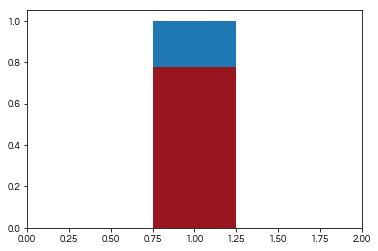

In [29]:
ngood = (data[:,:,0] == 255).sum()
nbad = (data[:,:,0] == 153).sum()
total = ngood + nbad
badness = nbad / total
goodness = ngood/  total
print(badness, goodness)

p1 = plt.bar([1], badness, [0.5], color='#991620')
p2 = plt.bar([1], goodness, [0.5], bottom=badness)
plt.xlim(0.0, 2.0)

In [32]:
# 372 pixels for full height, 72 for goodness
goodness_apparent = 79./362.

In [33]:
print(goodness_apparent)

0.21823204419889503


In [34]:
ngood

11541

In [35]:
nbad

39950

In [36]:
1.0-goodness_apparent

0.781767955801105